<div style="display: flex; justify-content: start; align-items: center; padding: 20px; background-color: #ff4d4d; color: white; border-bottom: 4px solid #b30000;">
    <div style="text-align: left;">
        <p style="margin: 0;">Tali Abdelwadoud</p>
        <p style="margin: 0;">Group 2</p>
    </div>
    <div style="flex-grow: 1; text-align: left; font-size: 32px; font-weight: bold; margin-left: 20px;">Interrogation 1</div>
</div>


<div style="margin: 20px 0; padding: 10px; border: 1px solid #ccc; border-radius: 5px; background-color: #ff4d4d;">
    <p style="font-size: 18px; font-weight: bold; margin: 0; text-align: left;">Activity :1</p>
</div>


### Selection Sort

No matter the case—best, average, or worst—we always need to check all elements in the array. For an array with \(N\) elements, the first iteration compares \(N-1\) elements, the second iteration compares \(N-2\), and so on until only 1 comparison remains. Adding these up gives the total comparisons as \((N-1)(N)/2\). For the swaps, we only perform \(N-1\), which is negligible compared to \(N^2\). So, the time complexity is \(T(N) = O(N^2)\).

### Bubble Sort

If no optimization is added (like stopping early when no swaps occur), we’ll always compare each pair of elements. For the first pass, we’ll compare \(N-1\) pairs, then \(N-2\) in the second pass, and so on, until we’re left with just one comparison. The number of swaps depends on how the array is organized, but the comparisons remain the same whether the array is sorted or not. As a result, the time complexity for all cases—best, average, and worst—is \(T(N) = O(N^2)\).

### Insertion Sort

Insertion sort works differently because it’s adaptive. It takes advantage of sorted elements. If the array is already sorted, the algorithm only makes \(N\) comparisons, one for each element, resulting in a time complexity of \(T(N) = O(N)\) in the best case. However, for unsorted arrays, you’ll need to compare and shift elements to their correct positions, making the time complexity \(T(N) = O(N^2)\) for these cases.


<div style="margin: 20px 0; padding: 10px; border: 1px solid #ccc; border-radius: 5px; background-color: #ff4d4d;">
    <p style="font-size: 18px; font-weight: bold; margin: 0; text-align: left;">Activity :2</p>
</div>


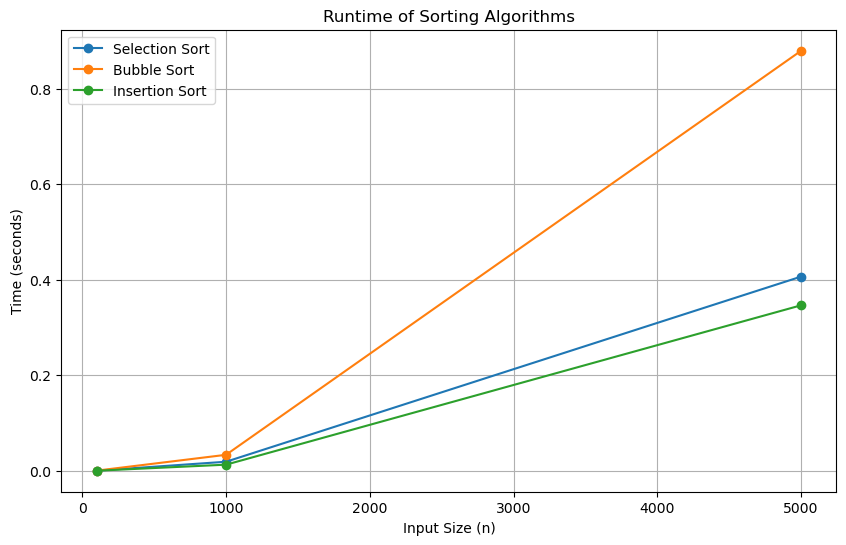

In [4]:
import random
import time
import matplotlib.pyplot as plt
def insertion(arr):
    for i in range(1, len(arr)):
        k = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > k:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = k


def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

def bubble(arr):
    length = len(arr)
    for i in range(length):
        for j in range(length - 1 - i):
            if arr[j] > arr[j + 1]:
                swap(arr, j, j + 1)

def selection(arr):
    for i in range(len(arr) - 1):
        min_index = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_index]:
                min_index = j
        swap(arr, i, min_index)


def generate_arrays(sizes):
    arrays = []
    for size in sizes:
        arrays.append([random.randint(0, 500) for temp in range(size)])
    return arrays

def measure_runtime(sort_function, arrays):
    runtimes = []
    for arr in arrays:
        temp = arr.copy()  
        start = time.time()
        sort_function(temp)
        end = time.time()
        runtimes.append(end - start)
    return runtimes

sizes = [100, 1000, 5000]

arrays = generate_arrays(sizes)

selection_runtimes = measure_runtime(selection, arrays)
bubble_runtimes = measure_runtime(bubble, arrays)
insertion_runtimes = measure_runtime(insertion, arrays)

plt.figure(figsize=(10, 6))
plt.plot(sizes, selection_runtimes, label="Selection Sort", marker='o')
plt.plot(sizes, bubble_runtimes, label="Bubble Sort", marker='o')
plt.plot(sizes, insertion_runtimes, label="Insertion Sort", marker='o')

plt.title("Runtime of Sorting Algorithms")
plt.xlabel("Input Size (n)")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid()
plt.show()


<div style="margin: 20px 0; padding: 10px; border: 1px solid #ccc; border-radius: 5px; background-color: #ff4d4d;">
    <p style="font-size: 18px; font-weight: bold; margin: 0; text-align: left;">Activity :3</p>
</div>


In [17]:
import pandas as pd
import random

def insertion(arr):
    comparisons = 0
    swaps = 0
    for i in range(1, len(arr)):
        k = arr[i]
        j = i - 1
        comparisons += 1
        while j >= 0 and arr[j] > k:
            if j != i -1:
                comparisons += 1
            arr[j + 1] = arr[j]
            j -= 1
            swaps += 1
        arr[j + 1] = k

    return comparisons, swaps

def bubble(arr):
    comparisons = 0
    swaps = 0
    length = len(arr)
    for i in range(length):
        for j in range(length - 1 - i):
            comparisons += 1
            if arr[j] > arr[j + 1]:
                swap(arr, j, j + 1)
                swaps += 1
    return comparisons, swaps

def selection(arr):
    comparisons = 0
    swaps = 0
    for i in range(len(arr) - 1):
        min_index = i
        for j in range(i + 1, len(arr)):
            comparisons += 1
            if arr[j] < min_index:
                min_index = j
        swap(arr, i, min_index)
        swaps += 1
    return comparisons, swaps

def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

def generate_arrays(sizes):
    arrays = {
        "random": [],
        "sorted": [],
        "reverse_sorted": []
    }
    for size in sizes:
        random_array = [random.randint(0, 500) for _ in range(size)]
        arrays["random"].append(random_array)
        arrays["sorted"].append(sorted(random_array))
        arrays["reverse_sorted"].append(sorted(random_array, reverse=True))
    return arrays

def measure_counts(sort_function, arrays):
    comparisons = []
    swaps = []
    for arr in arrays:
        temp = arr.copy()
        comp, swp = sort_function(temp)
        comparisons.append(comp)
        swaps.append(swp)
    return comparisons, swaps

sizes = [100, 500, 1000]

arrays = generate_arrays(sizes)

results = {
    "Selection Sort": {},
    "Bubble Sort": {},
    "Insertion Sort": {}
}

for algo_name, sort_func in [("Selection Sort", selection), ("Bubble Sort", bubble), ("Insertion Sort", insertion)]:
    for array_type, array_set in arrays.items():
        comparisons, swaps = measure_counts(sort_func, array_set)
        results[algo_name][array_type] = {"comparisons": comparisons, "swaps": swaps}

data = []

for algo_name in results:
    for array_type in results[algo_name]:
        for i, size in enumerate(sizes):
            data.append({
                "Algorithm": algo_name,
                "Array Type": array_type,
                "Input Size": size,
                "Comparisons": results[algo_name][array_type]["comparisons"][i],
                "Swaps": results[algo_name][array_type]["swaps"][i]
            })

df = pd.DataFrame(data)

print(df)


         Algorithm      Array Type  Input Size  Comparisons   Swaps
0   Selection Sort          random         100         4950      99
1   Selection Sort          random         500       124750     499
2   Selection Sort          random        1000       499500     999
3   Selection Sort          sorted         100         4950      99
4   Selection Sort          sorted         500       124750     499
5   Selection Sort          sorted        1000       499500     999
6   Selection Sort  reverse_sorted         100         4950      99
7   Selection Sort  reverse_sorted         500       124750     499
8   Selection Sort  reverse_sorted        1000       499500     999
9      Bubble Sort          random         100         4950    2488
10     Bubble Sort          random         500       124750   62391
11     Bubble Sort          random        1000       499500  254875
12     Bubble Sort          sorted         100         4950       0
13     Bubble Sort          sorted         500  

### Selection Sort

- **Results**: Comparisons match \((N-1)(N)/2\) and swaps are \(N-1\), regardless of input type.
- **Conclusion**: Consistent \(O(N^2)\) complexity across all cases due to fixed comparisons.

### Bubble Sort

- **Results**: Comparisons same as Selection sort, but swaps vary (minimal for sorted, maximum for reverse-sorted).
- **Conclusion**: Optimizable but retains \(O(N^2)\) complexity for unsorted cases.

### Insertion Sort

- **Results**: Comparisons are \(O(N)\) for sorted arrays and \(O(N^2)\) for random/reverse-sorted. Swaps match comparisons.
- **Conclusion**: Adaptive, with \(O(N)\) in the best case and \(O(N^2)\) otherwise.

The results align perfectly with the theoretical complexity for each algorithm.


<div style="margin: 20px 0; padding: 10px; border: 1px solid #ccc; border-radius: 5px; background-color: #ff4d4d;">
    <p style="font-size: 18px; font-weight: bold; margin: 0; text-align: left;">Activity :4</p>
</div>


In [18]:
def insertion(arr):
    print("Insertion Sort:\n")
    for i in range(1, len(arr)):
        k = arr[i]
        j = i - 1
        print(f"Compared: {arr[j]} > {k}")
        while j >= 0 and arr[j] > k:
            if j != i - 1:
                print(f"Compared: {arr[j]} > {k}")
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = k
        print(f"Placed element {k} at position {j + 1}")
        print("Array after modification:", arr, "\n")


def bubble(arr):
    print("Bubble Sort:\n")
    length = len(arr)
    for i in range(length):
        for j in range(length - 1 - i):
            print(f"Compared: {arr[j]} and {arr[j + 1]}")
            if arr[j] > arr[j + 1]:
                swap(arr, j, j + 1)
                print(f"Swapped: {arr[j]} and {arr[j + 1]}")
                print("Array after modification:", arr, "\n")


def selection(arr):
    print("Selection Sort:\n")
    for i in range(len(arr) - 1):
        min_index = i
        for j in range(i + 1, len(arr)):
            print(f"Compared: {arr[j]} and {arr[min_index]}")
            if arr[j] < arr[min_index]:
                min_index = j
        if min_index != i:
            swap(arr, i, min_index)
            print(f"Swapped: {arr[i]} and {arr[min_index]}")
        print("Array after modification:", arr, "\n")


def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]


array = [5, 3, 8, 4, 2]

insertion(array.copy())
bubble(array.copy())
selection(array.copy())


Insertion Sort:

Compared: 5 > 3
Placed element 3 at position 0
Array after modification: [3, 5, 8, 4, 2] 

Compared: 5 > 8
Placed element 8 at position 2
Array after modification: [3, 5, 8, 4, 2] 

Compared: 8 > 4
Compared: 5 > 4
Placed element 4 at position 1
Array after modification: [3, 4, 5, 8, 2] 

Compared: 8 > 2
Compared: 5 > 2
Compared: 4 > 2
Compared: 3 > 2
Placed element 2 at position 0
Array after modification: [2, 3, 4, 5, 8] 

Bubble Sort:

Compared: 5 and 3
Swapped: 3 and 5
Array after modification: [3, 5, 8, 4, 2] 

Compared: 5 and 8
Compared: 8 and 4
Swapped: 4 and 8
Array after modification: [3, 5, 4, 8, 2] 

Compared: 8 and 2
Swapped: 2 and 8
Array after modification: [3, 5, 4, 2, 8] 

Compared: 3 and 5
Compared: 5 and 4
Swapped: 4 and 5
Array after modification: [3, 4, 5, 2, 8] 

Compared: 5 and 2
Swapped: 2 and 5
Array after modification: [3, 4, 2, 5, 8] 

Compared: 3 and 4
Compared: 4 and 2
Swapped: 2 and 4
Array after modification: [3, 2, 4, 5, 8] 

Compared: 3 a

### Summary of the Algorithms

- **Insertion Sort**: Builds a sorted section each time with an adaptive and efficient algorithm make it the best choice for almost sorted arrays.

  - **Complexity**: \(O(N^2)\) in general, \(O(N)\) in the best case.

- **Bubble Sort**: Compares and swaps adjacent elements moving the largest element to the end, Easy to implement but inefficient

  - **Complexity**: \(O(N^2)\), with \(O(N)\) possible for optimized algorithm.

- **Selection Sort**: Selects the smallest element from the unsorted section and swaps it to the correct position, Inefficient.
  - **Complexity**: Always \(O(N^2)\).


<div style="margin: 20px 0; padding: 10px; border: 1px solid #ccc; border-radius: 5px; background-color: #ff4d4d;">
    <p style="font-size: 18px; font-weight: bold; margin: 0; text-align: left;">Activity :5</p>
</div>


In [22]:
import random
import pandas as pd

# Regular Bubble Sort
def regular_bubble(arr):
    comparisons = 0
    swaps = 0
    length = len(arr)
    for i in range(length):
        for j in range(length - 1 - i):
            comparisons += 1
            if arr[j] > arr[j + 1]:
                swap(arr, j, j + 1)
                swaps += 1
    return comparisons, swaps

# Optimized Bubble Sort
def optimized_bubble(arr):
    comparisons = 0
    swaps = 0
    length = len(arr)
    for i in range(length):
        sorted = True
        for j in range(length - 1 - i):
            comparisons += 1
            if arr[j] > arr[j + 1]:
                swap(arr, j, j + 1)
                swaps += 1
                sorted = False
        if sorted:
            break
    return comparisons, swaps

def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

size = 5000
random_array = [random.randint(0, 10000) for _ in range(size)]
sorted_array = sorted(random_array)
almost_sorted_array = sorted_array[:]
swap(almost_sorted_array, 0, 4999)  # Introduce slight disorder
reverse_sorted_array = sorted(random_array, reverse=True)

data = {
    "Algorithm": [],
    "Array Type": [],
    "Comparisons": [],
    "Swaps": []
}

for algo_name, algo_func in [("Regular Bubble Sort", regular_bubble), ("Optimized Bubble Sort", optimized_bubble)]:
    for array_type, array in [
        ("Random", random_array),
        ("Sorted", sorted_array),
        ("Reverse Sorted", reverse_sorted_array),
        ("Almost Sorted", almost_sorted_array)
    ]:
        comparisons, swaps = algo_func(array.copy())
        data["Algorithm"].append(algo_name)
        data["Array Type"].append(array_type)
        data["Comparisons"].append(comparisons)
        data["Swaps"].append(swaps)

df = pd.DataFrame(data)
print(df)


               Algorithm      Array Type  Comparisons     Swaps
0    Regular Bubble Sort          Random     12497500   6145721
1    Regular Bubble Sort          Sorted     12497500         0
2    Regular Bubble Sort  Reverse Sorted     12497500  12496250
3    Regular Bubble Sort   Almost Sorted     12497500      9996
4  Optimized Bubble Sort          Random     12497149   6145721
5  Optimized Bubble Sort          Sorted         4999         0
6  Optimized Bubble Sort  Reverse Sorted     12497500  12496250
7  Optimized Bubble Sort   Almost Sorted     12497500      9996


### Explanation

According to the dataframe we can conclude that the optimized version is only an optimal choice for almost sorted arrays


<div style="margin: 20px 0; padding: 10px; border: 1px solid #ccc; border-radius: 5px; background-color: #ff4d4d;">
    <p style="font-size: 18px; font-weight: bold; margin: 0; text-align: left;">Activity :6</p>
</div>


In [26]:
import random
import pandas as pd

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        merge_sort(left)
        merge_sort(right)
        
        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1

def enhanced_merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        enhanced_merge_sort(left)
        enhanced_merge_sort(right)

        if left[-1] <= right[0]:
            arr[:] = left + right  
            return

        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1

def measure_time(sort_function, array):
    import time
    start = time.time()
    sort_function(array)
    end = time.time()
    return end - start

size = 500
random_array = [random.randint(0, 10000) for _ in range(size)]
sorted_array = sorted(random_array)
almost_sorted_array = sorted_array[:]
almost_sorted_array[0], almost_sorted_array[-1] = almost_sorted_array[-1], almost_sorted_array[0]
reverse_sorted_array = sorted(random_array, reverse=True)

data = {
    "Algorithm": [],
    "Array Type": [],
    "Time (Seconds)": []
}

for algo_name, algo_func in [("Merge Sort", merge_sort), ("Enhanced Merge Sort", enhanced_merge_sort)]:
    for array_type, array in [
        ("Random", random_array),
        ("Sorted", sorted_array),
        ("Reverse Sorted", reverse_sorted_array),
        ("Almost Sorted", almost_sorted_array)
    ]:
        time_taken = measure_time(algo_func, array.copy())
        data["Algorithm"].append(algo_name)
        data["Array Type"].append(array_type)
        data["Time (Seconds)"].append(time_taken)

df = pd.DataFrame(data)
df = df.sort_values(by="Time (Seconds)", ascending=True)
print(df)



             Algorithm      Array Type  Time (Seconds)
5  Enhanced Merge Sort          Sorted        0.003059
7  Enhanced Merge Sort   Almost Sorted        0.003665
1           Merge Sort          Sorted        0.004108
2           Merge Sort  Reverse Sorted        0.004110
3           Merge Sort   Almost Sorted        0.004111
6  Enhanced Merge Sort  Reverse Sorted        0.004155
4  Enhanced Merge Sort          Random        0.004451
0           Merge Sort          Random        0.004533
